Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [26]:
import pandas as pd
import numpy as np
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data, columns = ("animal","age","visits","priority"), index = ('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'))
df


,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**2.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [27]:
df.describe()

,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


**3.** Return the first 3 rows of the DataFrame `df`.

In [28]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**4.** Display the 'animal' and 'age' columns from the DataFrame `df`

In [29]:
df[["animal","age"]]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**5.** Display the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']'

In [30]:
df_1 = df[["animal","age"]]
df_1.loc[["c","d","h"]]

,animal,age
c,snake,0.5
d,dog,NaN
h,cat,NaN


**6.** Select only the rows where the number of visits is greater than 3.

In [31]:
df_2 = df[df["visits"]>3]
df_2

,animal,age,visits,priority


**7.** Select the rows where the age is missing, i.e. it is `NaN`.

In [32]:
df_3 = df.loc[df["age"].isnull()]
df_3

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


**8.** Select the rows where the animal is a cat *and* the age is less than 3.

In [33]:
df_4 = df[df["animal"] == "cat"]
df_4[df_4["age"]<3]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**9.** Select the rows where the age is between 2 and 4 (inclusive)

In [34]:
df.loc[(df["age"] >= 2) & (df["age"] <= 4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


**10.** Change the age in row 'f' to 1.5.

In [35]:
df.loc[["f"],["age"]] = 1.5
df.loc["f"]

animal      cat
age         1.5
visits        3
priority     no
Name: f, dtype: object

**11.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

In [36]:
df["visits"].sum()

np.int64(19)

**12.** Calculate the mean age for each different animal in `df`.

In [37]:
g = df.groupby("animal")["age"].mean()
g

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

**13.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [38]:
data_add = {'animal': 'cat',
        'age': 3,
        'visits': 2,
        'priority':'yes'}
df_newdata = pd.DataFrame(data_add, columns = ("animal","age","visits","priority"),index=["k"])
df_update = pd.concat([df, df_newdata], axis = 0)
df_update

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [39]:
df = df_update.drop(index =["k"])
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**14.** Count the number of each type of animal in `df`.

In [40]:
gby = df["animal"].value_counts()
gby

animal
cat      4
dog      4
snake    2
Name: count, dtype: int64

**15.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [41]:
df_sorted = df.sort_values(by=["age","visits"],ascending= [False,True])
df_sorted

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


**16.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [42]:
df_2 = df.replace(to_replace = 'yes', value = True) 
df_2.replace(to_replace = 'no', value = False)

C:\Users\hp\AppData\Local\Temp\ipykernel_16580\3719654131.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_2.replace(to_replace = 'no', value = False)


,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,1.5,3,False
g,snake,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


**17.** In the 'animal' column, change the 'snake' entries to 'python'.

In [43]:
df.replace(to_replace = 'snake', value = 'python')

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,python,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,python,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**18.** Load the ny-flights dataset to Python

In [44]:
file = pd.read_csv("ny-flights.csv")
file

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20812,2014-01-31 00:00:00,UA,19977,N54711,1253,ROC,ORD,801.0,-4.0,908.0,4.0,0.0,2014-01-31 09:08:00,2014-01-31 08:01:00
20813,2014-01-31 00:00:00,UA,19977,N77525,1429,LGA,CLE,1522.0,-10.0,1649.0,-31.0,0.0,2014-01-31 16:49:00,2014-01-31 15:22:00
20814,2014-01-31 00:00:00,UA,19977,N37293,1456,LGA,IAH,719.0,-6.0,1006.0,-20.0,0.0,2014-01-31 10:06:00,2014-01-31 07:19:00
20815,2014-01-31 00:00:00,UA,19977,N24729,1457,LGA,IAH,852.0,7.0,1156.0,-6.0,0.0,2014-01-31 11:56:00,2014-01-31 08:52:00


**19.** Which airline ID is present maximum times in the dataset

In [45]:
max_id = file["airline_id"].value_counts()
max_id.head(1)

airline_id
20409    4902
Name: count, dtype: int64

**20.** Draw a plot between dep_delay and arr_delay

import matplotlib.pyplot as plt
file.dropna()
x = np.array(file["dep_delay"])
y = np.array(file["arr_delay"])
plt.scatter(x,y)
plt.xlabel("dep_delay")
plt.ylabel("arr_delay")
plt.title('dep_delay Vs arr_delay')
plt.show()

### Diabetes Datasets EDA

In [49]:
df = pd.read_csv("diabetes_model.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5,77,82,41,42,35.8,0.156,35,0
1,9,122,56,0,0,33.3,1.114,33,1
2,0,113,76,0,0,33.3,0.278,23,1
3,1,139,62,41,480,40.7,0.536,21,0
4,10,161,68,23,132,25.5,0.326,47,1
...,...,...,...,...,...,...,...,...,...
609,4,114,64,0,0,28.9,0.126,24,0
610,2,175,88,0,0,22.9,0.326,22,0
611,3,121,52,0,0,36.0,0.127,25,1
612,7,136,74,26,135,26.0,0.647,51,0


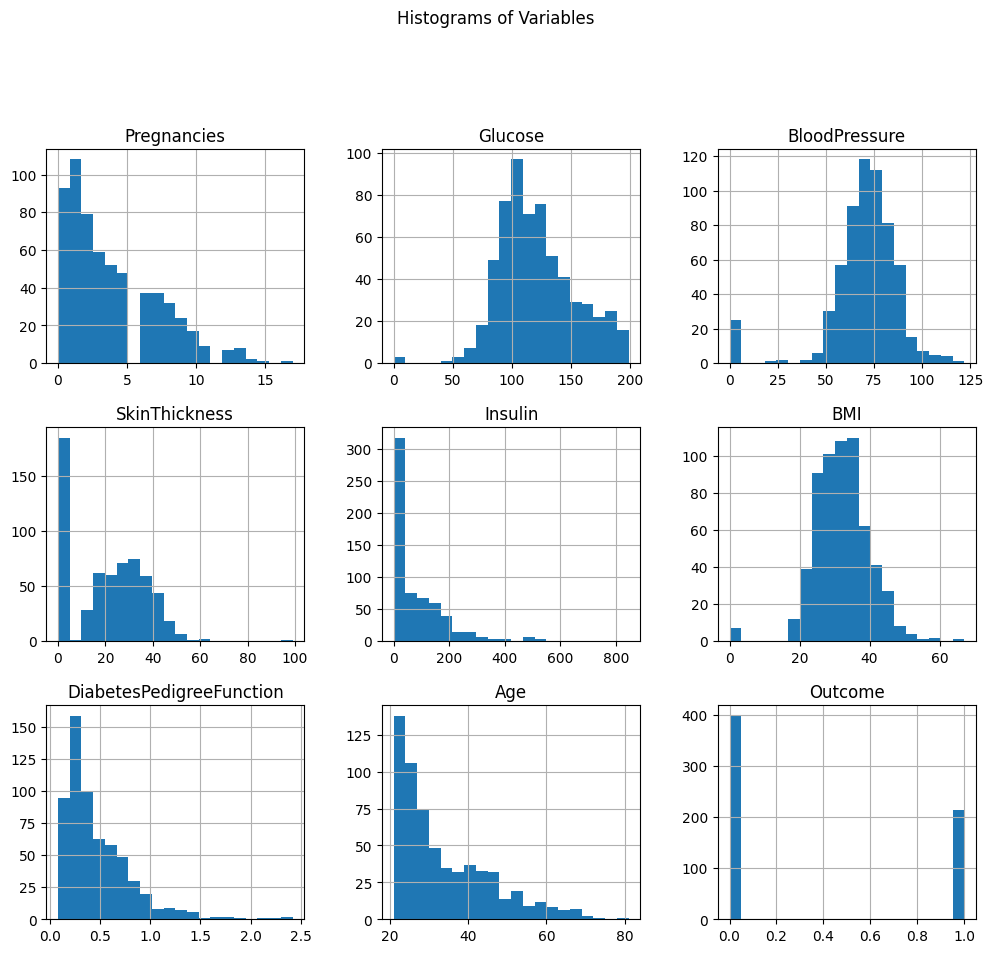

In [50]:
#histogram
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Variables", y=1.02)
plt.show()


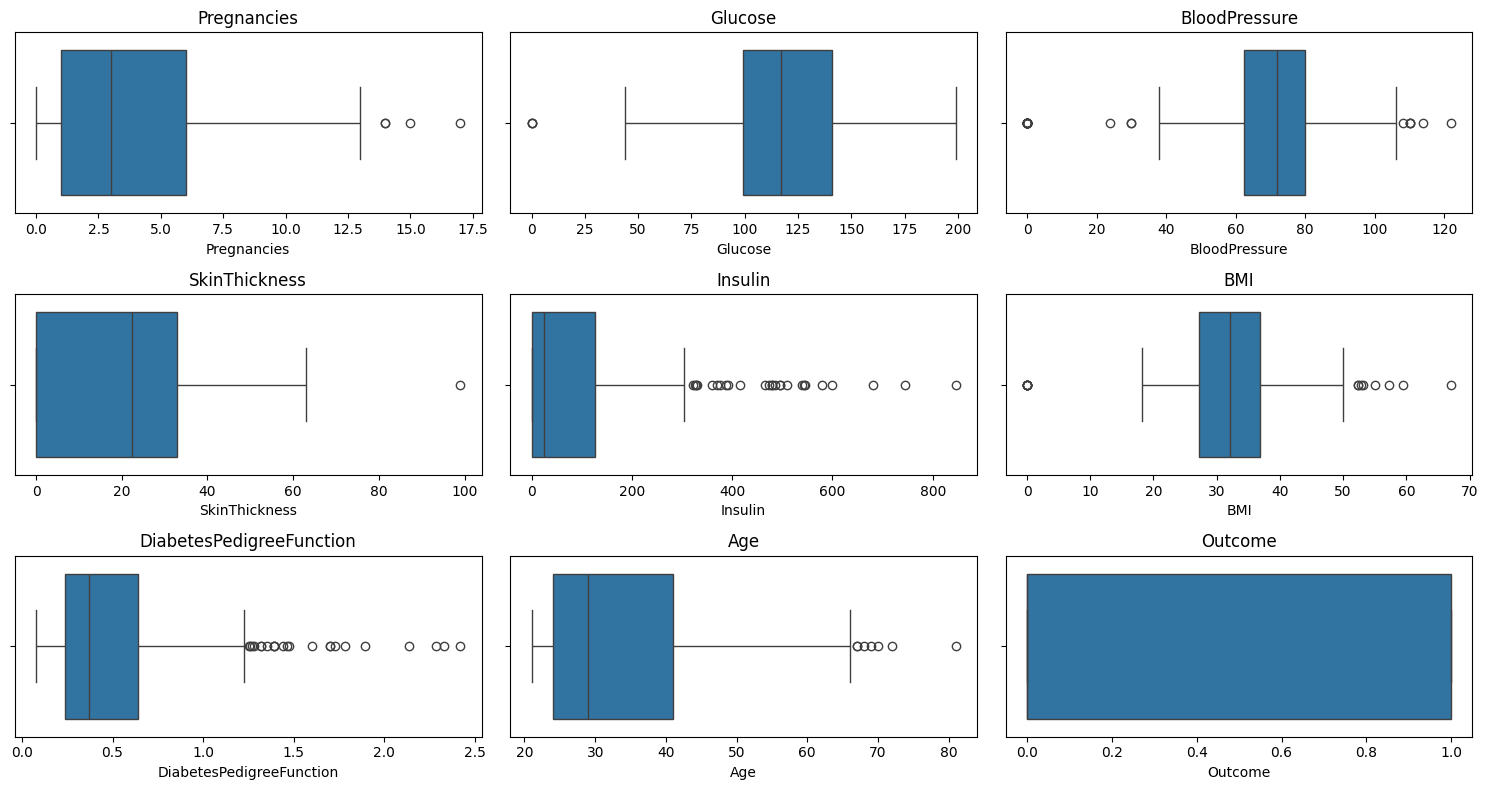

In [51]:
# Box plots to check for outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

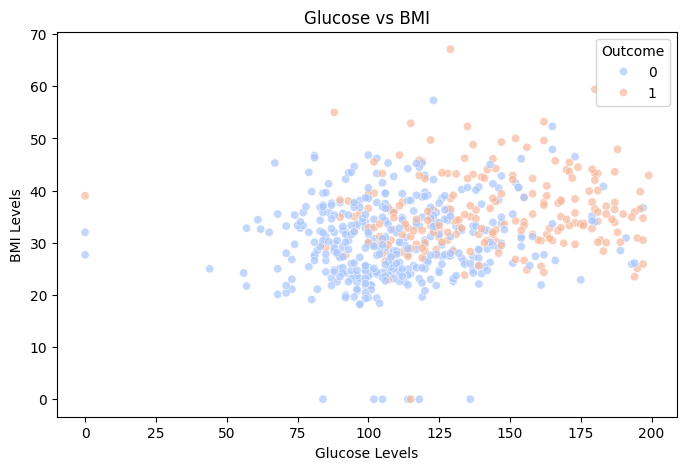

In [52]:
#scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Glucose"], y=df["BMI"], hue=df["Outcome"], palette="coolwarm", alpha=.7)
plt.title("Glucose vs BMI")
plt.xlabel("Glucose Levels")
plt.ylabel("BMI Levels")
plt.show()

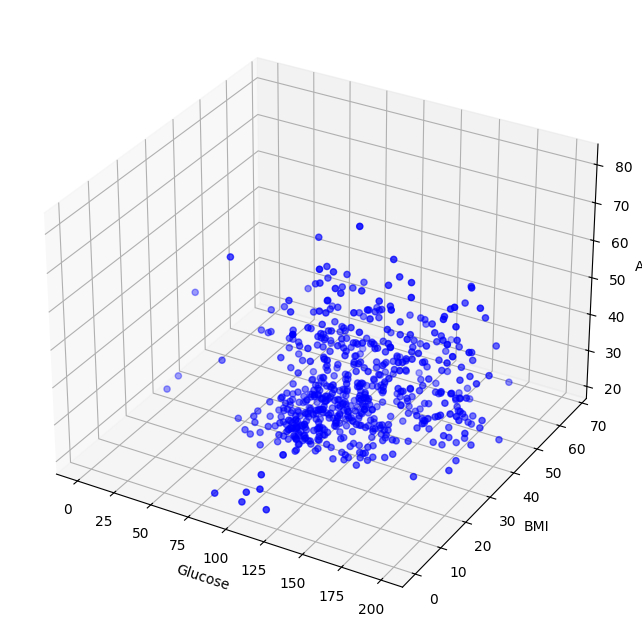

In [53]:
#3D Plots
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Replace with relevant column names
ax.scatter(df['Glucose'], df['BMI'], df['Age'], c='blue', marker='o')
ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')

plt.show()

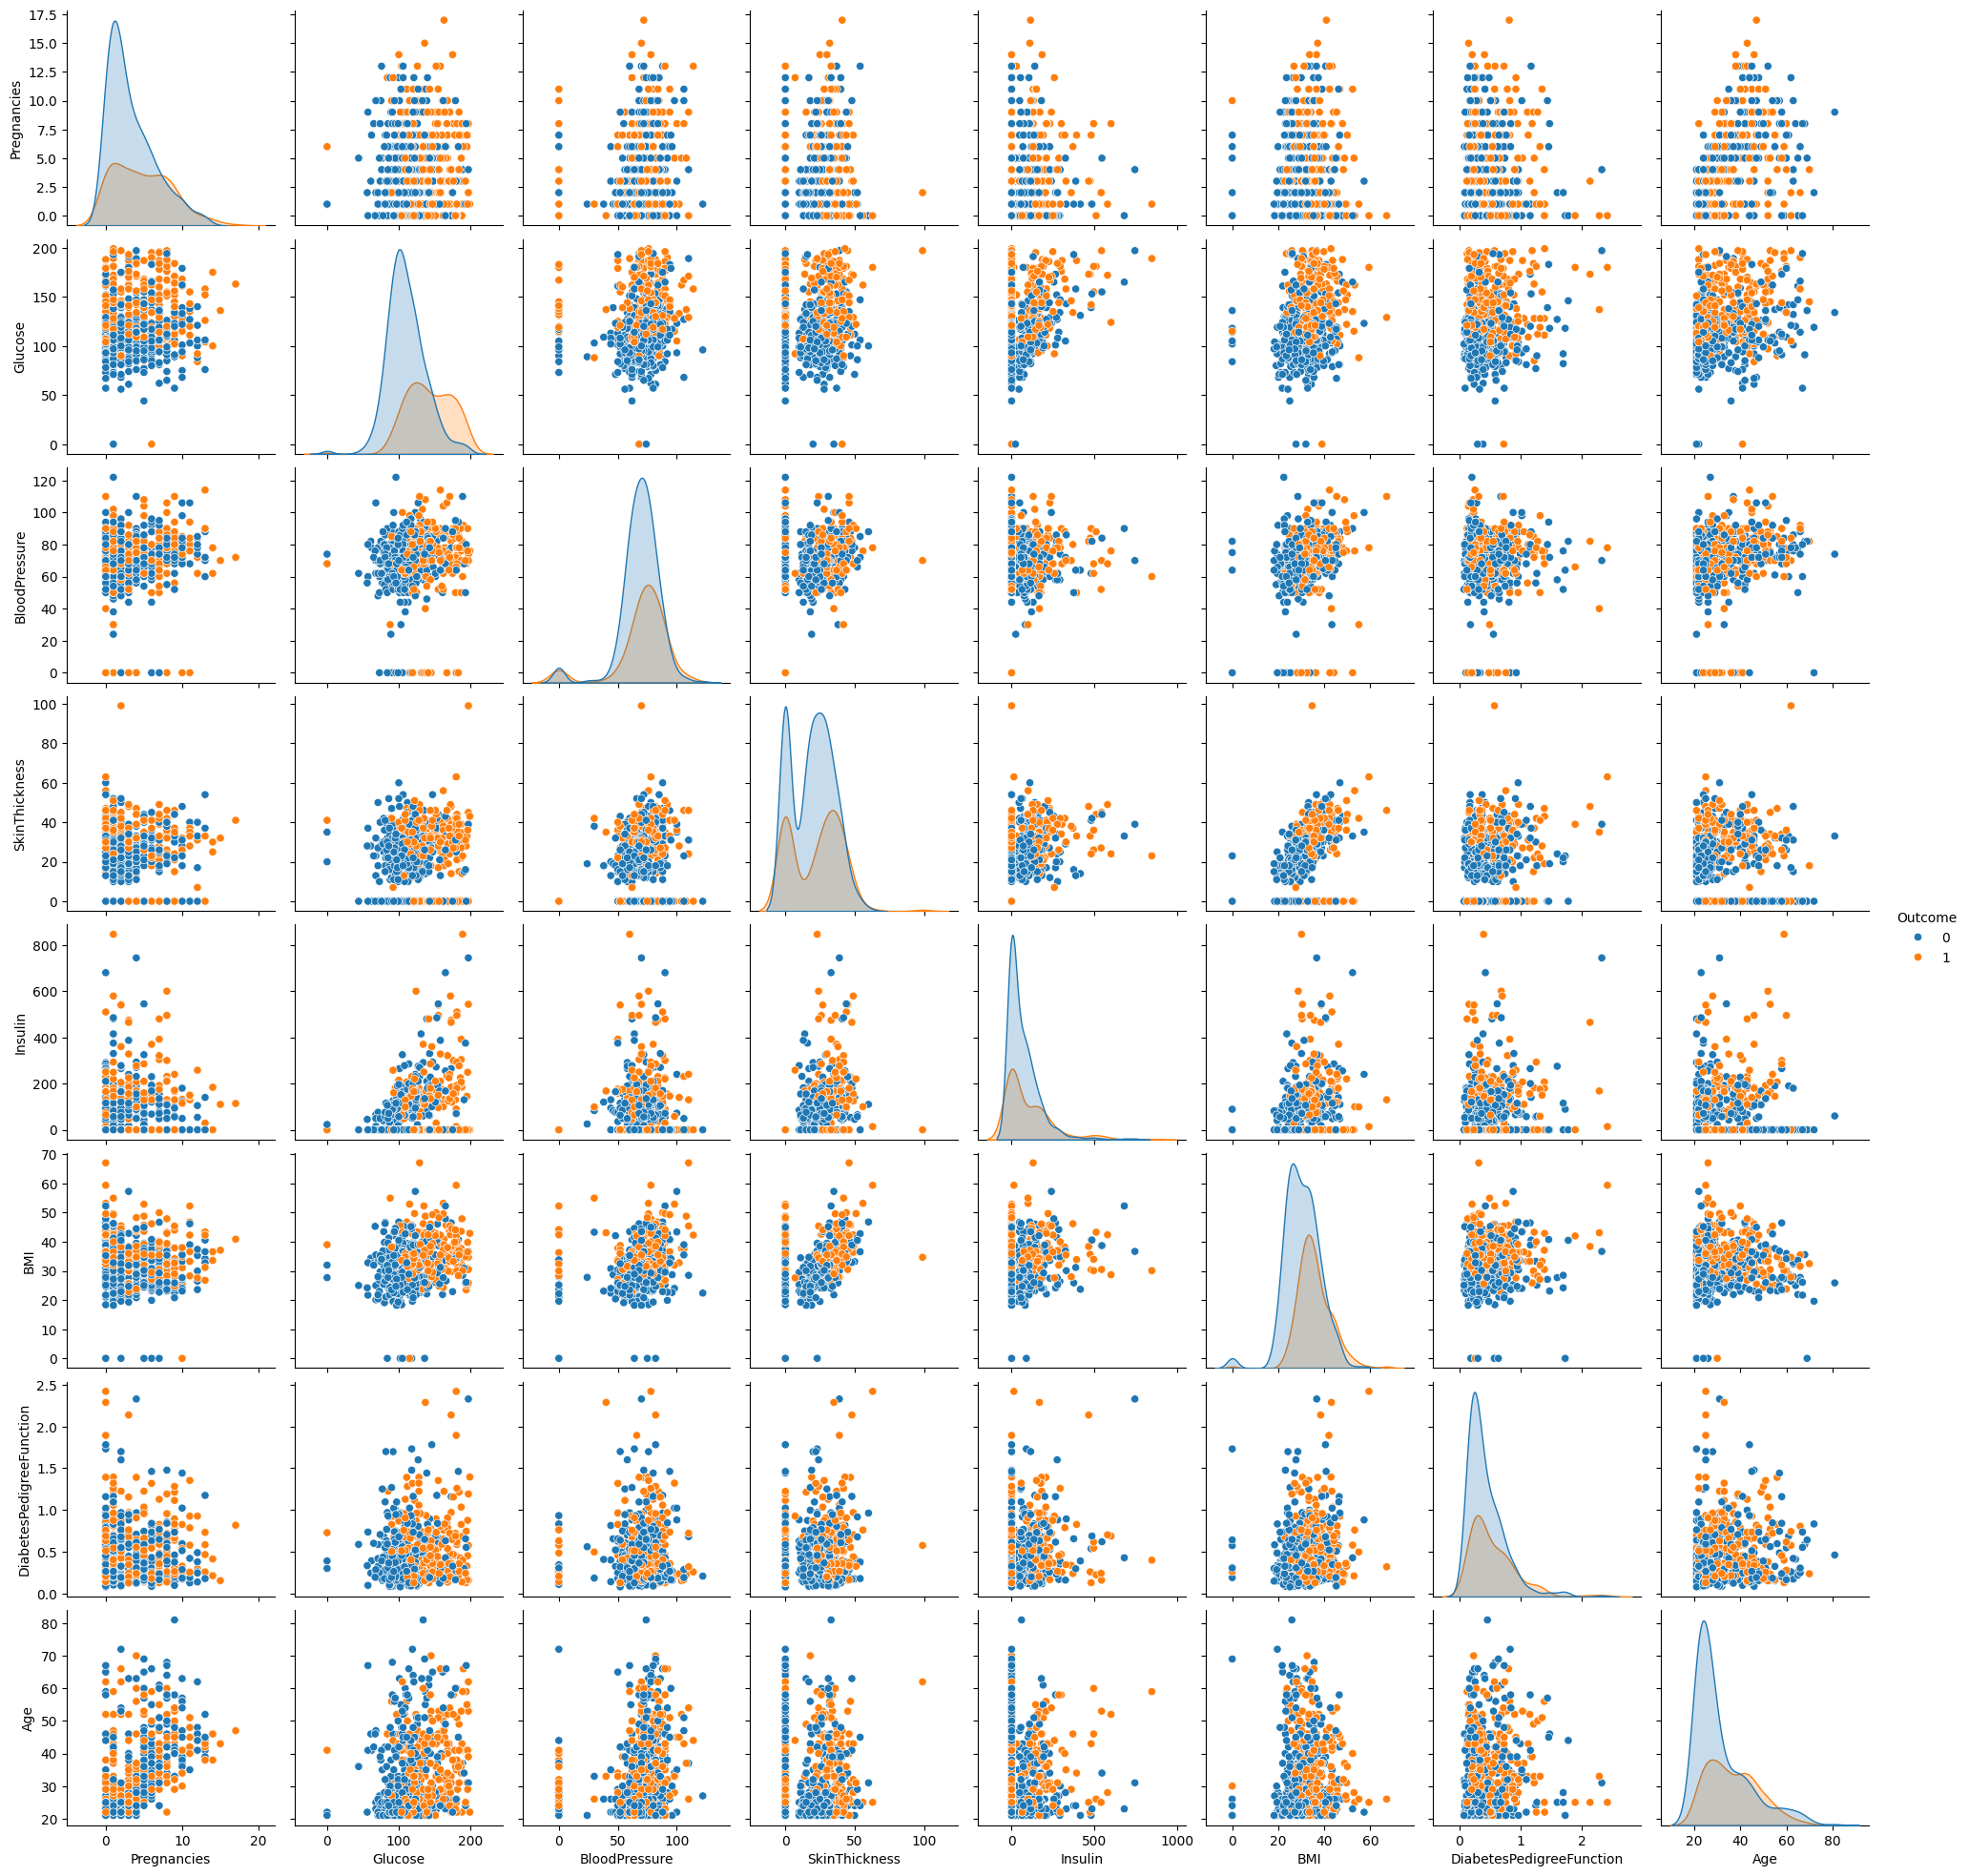

In [54]:
#pair Plot
sns.pairplot(df, hue='Outcome')  # Replace 'Outcome' with the target column
plt.show()

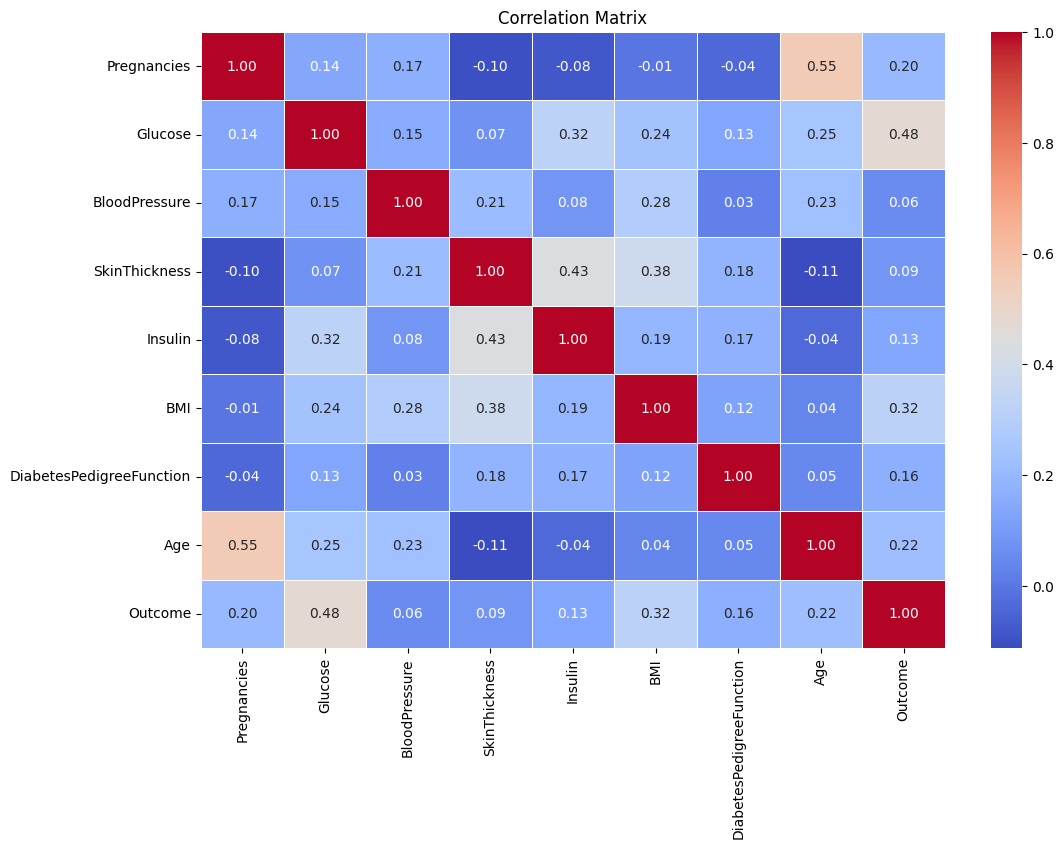

In [55]:
#Correlation Matrix
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


### ny_Flights

In [51]:
file = pd.read_csv("ny-flights.csv")
file


,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20812,2014-01-31 00:00:00,UA,19977,N54711,1253,ROC,ORD,801.0,-4.0,908.0,4.0,0.0,2014-01-31 09:08:00,2014-01-31 08:01:00
20813,2014-01-31 00:00:00,UA,19977,N77525,1429,LGA,CLE,1522.0,-10.0,1649.0,-31.0,0.0,2014-01-31 16:49:00,2014-01-31 15:22:00
20814,2014-01-31 00:00:00,UA,19977,N37293,1456,LGA,IAH,719.0,-6.0,1006.0,-20.0,0.0,2014-01-31 10:06:00,2014-01-31 07:19:00
20815,2014-01-31 00:00:00,UA,19977,N24729,1457,LGA,IAH,852.0,7.0,1156.0,-6.0,0.0,2014-01-31 11:56:00,2014-01-31 08:52:00


In [52]:
# Summary Statistics
file.describe()

,airline_id,fl_num,dep_time,dep_delay,arr_time,arr_delay,cancelled
count,20817.000000,20817.000000,18462.000000,18462.000000,18412.000000,18383.000000,20817.00000
mean,20109.614882,1826.098813,1319.991713,22.772127,1493.698566,21.380732,0.11505
std,370.715209,1548.188325,479.999940,59.766152,518.851657,64.605591,0.31909
min,19393.000000,1.000000,1.000000,-112.000000,1.000000,-112.000000,0.00000
25%,19790.000000,472.000000,858.000000,-4.000000,1110.750000,-12.000000,0.00000
50%,20355.000000,1457.000000,1336.000000,0.000000,1519.000000,3.000000,0.00000
75%,20409.000000,2701.000000,1720.000000,22.000000,1923.000000,28.000000,0.00000
max,21171.000000,6258.000000,2400.000000,973.000000,2400.000000,996.000000,1.00000


In [54]:
# Find shape size and dimension
file.size


291438

In [55]:
file.ndim


2

In [56]:
file.shape

(20817, 14)

In [57]:
# Checking for data types and null values
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20817 entries, 0 to 20816
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fl_date         20817 non-null  object 
 1   unique_carrier  20817 non-null  object 
 2   airline_id      20817 non-null  int64  
 3   tail_num        20512 non-null  object 
 4   fl_num          20817 non-null  int64  
 5   origin          20817 non-null  object 
 6   dest            20817 non-null  object 
 7   dep_time        18462 non-null  float64
 8   dep_delay       18462 non-null  float64
 9   arr_time        18412 non-null  float64
 10  arr_delay       18383 non-null  float64
 11  cancelled       20817 non-null  float64
 12  arr             18412 non-null  object 
 13  dep             18462 non-null  object 
dtypes: float64(5), int64(2), object(7)
memory usage: 2.2+ MB


In [58]:
#Finding null values
file.isnull().sum()

fl_date              0
unique_carrier       0
airline_id           0
tail_num           305
fl_num               0
origin               0
dest                 0
dep_time          2355
dep_delay         2355
arr_time          2405
arr_delay         2434
cancelled            0
arr               2405
dep               2355
dtype: int64

In [59]:
# Removing null data 
file.dropna()

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20812,2014-01-31 00:00:00,UA,19977,N54711,1253,ROC,ORD,801.0,-4.0,908.0,4.0,0.0,2014-01-31 09:08:00,2014-01-31 08:01:00
20813,2014-01-31 00:00:00,UA,19977,N77525,1429,LGA,CLE,1522.0,-10.0,1649.0,-31.0,0.0,2014-01-31 16:49:00,2014-01-31 15:22:00
20814,2014-01-31 00:00:00,UA,19977,N37293,1456,LGA,IAH,719.0,-6.0,1006.0,-20.0,0.0,2014-01-31 10:06:00,2014-01-31 07:19:00
20815,2014-01-31 00:00:00,UA,19977,N24729,1457,LGA,IAH,852.0,7.0,1156.0,-6.0,0.0,2014-01-31 11:56:00,2014-01-31 08:52:00


In [62]:
file.columns.tolist()

['fl_date',
 'unique_carrier',
 'airline_id',
 'tail_num',
 'fl_num',
 'origin',
 'dest',
 'dep_time',
 'dep_delay',
 'arr_time',
 'arr_delay',
 'cancelled',
 'arr',
 'dep']